# 向量空間與降維，SVD 與 PCA
* 文字探勘很重要的一個步驟是將字詞或文章向量化，變成數據之後，方能進行數學計算。
* 降維基本上是將複雜的數據簡單化，是一個很重要的技巧。本節將舉例說明其基本的原理與應用。

## 先從兩個維度的向量開始

In [8]:
path ='d:/My Python/'
# 假設有三個點 (X座標, Y座標)
point=[[5,1],[7,9],[0,7]]
print([1])

7


In [2]:
point=[[5,1],[7,9],[0,7]]
print(point[1])

[7, 9]


## 繪製二度空間散布圖

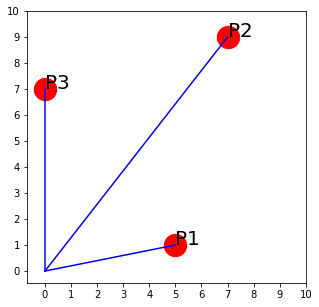

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# 圖形大小
fig, ax = plt.subplots(figsize=(5,5))

# 依序繪點
for p in point:
    ax.scatter(p[0], p[1], s=500,color='red')
    ax.plot([0,p[0]],[0,p[1]], color='blue')
    
xticks = [0,1,2,3,4,5,6,7,8,9,10]
yticks = [0,1,2,3,4,5,6,7,8,9,10]

ax.set_yticks(yticks)              ## ysticklagels
ax.set_xticks(xticks)              ## ysticklagels

# 文字
t=['P1','P2','P3']

# 加標籤
for i, txt in enumerate(t):
    ax.annotate(txt, point[i], size=20)
    
# show    
plt.show()    
    

## length
* 向量自己與自己的內積，開根號，就是到原點的長度。

In [4]:
import numpy as np
for p in point:
    p=np.array(p)
    print(p)
    # 向量自己與自己的內積(元素兩兩相乘之和)，開根號，就是到原點的長度。 距離公式
    # .T 是矩陣轉置。
    length=np.sqrt(p.dot(p.T))
    print (length)
    

[5 1]
5.0990195135927845
[7 9]
11.40175425099138
[0 7]
7.0


## 內積求算 cos
* 兩向量的內積除以其長度，就是 cos 值
* p1, p2 內積 = $||p1||*||p2||* cos$ 
* $||p1||表p1的長度，$||p2||表p2的長度
* 內積就是向量對應的元素兩兩相乘，再相加
* p1(x1, y1), p2(x2,y2) 內積為 x1*x2 + y1*y2，即 p1.dot(p2.T)

In [19]:
# p1 與 p2 為兩向量，list 改 np.array 便於數學計算
p1=np.array(point[0])
p2=np.array(point[1])
# 長度
len_p1=np.sqrt(p1.dot(p1.T))
# 也可以用 norm函數 計算，答案一樣
Len_p1=np.linalg.norm(p1)
len_p2=np.sqrt(p2.dot(p2.T))
#兩向量的 cos 夾角 的值
cos=p1.dot(p2.T)/(len_p1*len_p2)
print ('cos ',cos)
# 如果沒有除以長度，則為p1向量在p2向量上的投影長
proj=p1.dot(p2.T)
print ('projection ',proj)


#查cos和內積的關係

cos  0.7568230077691597
projection  44


## 夾角愈小，cos值愈大，表示兩向量愈接近。
* 知道cos值就知道夾角，反之亦然。
* 當夾角為 0 時，cos值=1，表示兩向量完全一樣。
* 當夾角為 90 時，cos值=0，表示兩向量獨立，相異。

## 孤度量(radian)與角度量(angle)切換
* radian 孤度量，圓周為 2*pi
* angle 角度量，圖周為 360

In [20]:
# arccos 求角度
radian=np.arccos(cos)
radian

0.7123575980943289

In [21]:
# 角度量
angle=radian*180/np.pi
angle

40.81508387488157

In [22]:
# 角度量轉孤量度
radian=angle/180*np.pi
print (radian)
# 孤量度轉角度量
angle=radian*180/np.pi
print (angle)

0.7123575980943287
40.81508387488157


## cos 函數
* cos 0 =1
* cos 90 =0

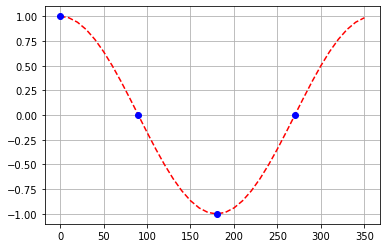

In [6]:
def f(t):
    return np.cos(t/180*np.pi)
t = np.arange(0, 360,10)
t1 = np.arange(0, 360,90)
plt.figure()
plt.grid(True)
plt.plot(t, f(t), 'r--')
plt.plot(t1, f(t1), 'bo')
plt.show()

# 函數：兩向量的相似性，計算夾角與cos

In [24]:
import numpy as np
def cos_simility(a, b):
    # list 改 array
    x = np.array(a)
    y = np.array(b)
    # 向量長度
    Lx=np.linalg.norm(x)
    Ly=np.linalg.norm(y)
    # cos 值
    cos=round(x.dot(y)/(Lx*Ly),8)
    # 角度
    radian=np.arccos(cos)  
    angle=radian*180/np.pi    
    return angle, cos

## 同學可以自己測試

In [25]:
# 兩個多維度的向量
a=[1,5,-1,1,2.2,1,3,1]
b=[2,2,-2,2,2,2,2,2]
cos=cos_simility(a,b)
print ('angle:',cos[0])
print ('cos:',cos[1])

angle: 35.74354784124601
cos: 0.81163977


## A 向量在 B 向量上的投影
* A 向量的長度愈長，投影愈長，與B 向量的長度無關。
* 夾角的絕對值愈小投影愈長。
* 其值為 $||A||* cos(angle)$


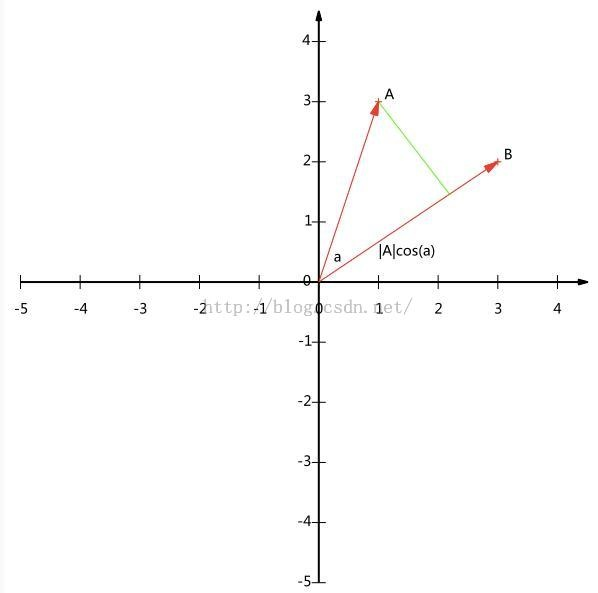

In [26]:
from IPython.display import Image
Image( "pic/向量與座標.jpg")

In [27]:
def projection(a,b):
    angle=cos_simility(a,b)[0]
    radian=angle/180*np.pi
    La=np.linalg.norm(a)
    proj=La*np.cos(radian)
    return proj

In [28]:
a=[5,8,7]
b=[5,0,2]
print (projection(a,b))


7.242118183228566


In [29]:
#2

# 找一個實際的例子

In [5]:
# 叫進所有的模組
from __future__ import print_function
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,
module="pandas", lineno=570)
import numpy

In [7]:
# 十篇文章，有經過斷詞
s0='早上 去 吃飯 了，點了 許多 好吃 的 青菜。'
s1='也 有 吃飯 了，是 吃 饅頭 和 豆漿'
s2='吃飯 了 有 好吃 的 青菜 '
s3='他們 只是上課'
s4='我們 和 他們 每天 都是 上課 和 睡覺'
s5='明天 上課 讓 生活 很 充實 之外 也 很 有 意義 了'
s6='明天 我們 不 打算 上課 了'
s7='明天 上課 很 無聊 了'
s8='明天 還是 一起 去 上課 吃飯 比較 有 意思 了'
s9='為了 上課 我們 明天 不 睡覺 了'
documents=[s0,s1,s2,s3,s4,s5,s6,s7,s8,s9]
doc_label=['0','1','2','3','4','5','6','7','8','9']

print(documents)

['早上 去 吃飯 了，點了 許多 好吃 的 青菜。', '也 有 吃飯 了，是 吃 饅頭 和 豆漿', '吃飯 了 有 好吃 的 青菜 ', '他們 只是上課', '我們 和 他們 每天 都是 上課 和 睡覺', '明天 上課 讓 生活 很 充實 之外 也 很 有 意義 了', '明天 我們 不 打算 上課 了', '明天 上課 很 無聊 了', '明天 還是 一起 去 上課 吃飯 比較 有 意思 了', '為了 上課 我們 明天 不 睡覺 了']


# 文章向量

In [9]:
# 字頻計算，ngram 可控制連續詞彙數
vectorizer = CountVectorizer(min_df = 0,ngram_range= (1,1))
dtm_count_obj = vectorizer.fit_transform(documents) 

#CountVectorizer 类会将文本中的词语转换为词频矩阵，例如矩阵中包含一个元素a[i][j]，它表示j词在i类文本下的词频。
#它通过 fit_transform 函数计算各个词语出现的次数，
#通过get_feature_names()可获取词袋中所有文本的关键字，
#通过 toarray()可看到词频矩阵的结果。

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

## 字詞列表

In [10]:
# 單一字詞被排除了
terms=vectorizer.get_feature_names()
print (len(terms),terms)

27 ['一起', '上課', '之外', '他們', '充實', '只是上課', '吃飯', '好吃', '意思', '意義', '我們', '打算', '早上', '明天', '每天', '比較', '為了', '無聊', '生活', '睡覺', '許多', '豆漿', '還是', '都是', '青菜', '饅頭', '點了']


## 文章字詞矩陣(dtm)
* 每個橫列都代表一個文章向量

In [11]:
# 轉成 array
dtm_count=dtm_count_obj.toarray() 

In [12]:
# 文章字詞矩陣（array 格式微）
dtm_count

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0]], dtype=int64)

In [13]:
# 轉成 DataFrame 看得清楚
df=pd.DataFrame(dtm_count, columns=terms)
df

,一起,上課,之外,他們,充實,只是上課,吃飯,好吃,意思,意義,...,無聊,生活,睡覺,許多,豆漿,還是,都是,青菜,饅頭,點了
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
dtm_count[1,2]

0

In [15]:
sim = []
for n in dtm_count:
    sim_row = []
    for m in dtm_count:
        cos = cos_simility(n,m)
        print(cos)
        

NameError: name 'cos_simility' is not defined

In [16]:
import numpy as np
def cos_simility(a, b):
    # list 改 array
    x = np.array(a)
    y = np.array(b)
    # 向量長度
    Lx=np.linalg.norm(x)
    Ly=np.linalg.norm(y)
    # cos 值
    cos=round(x.dot(y)/(Lx*Ly),8)
    # 角度
    radian=np.arccos(cos)  
    angle=radian*180/np.pi    
    return angle, cos

In [17]:
# 各篇文章相似性，cos #夾角越大，表兩篇文章相似度低
sim=[]
for n in dtm_count:
    sim_row=[]
    for m in dtm_count:
        cos=cos_simility(n,m)
        sim_row.append(cos[1])
    sim.append(sim_row)

df_count=pd.DataFrame(sim)
df_count
#餘弦相似性數值越高，代表文章越相似(1為0度)
#向量距離: https://blog.csdn.net/u010412858/article/details/60467382
#餘弦相似度: https://www.ruanyifeng.com/blog/2013/03/cosine_similarity.html

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.235702,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.154303,0.000000
1,0.235702,1.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.218218,0.000000
2,0.707107,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218218,0.000000
3,0.000000,0.000000,0.000000,1.000000,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.288675,1.000000,0.166667,0.408248,0.235702,0.154303,0.547723
5,0.000000,0.000000,0.000000,0.000000,0.166667,1.000000,0.408248,0.471405,0.308607,0.365148
6,0.000000,0.000000,0.000000,0.000000,0.408248,0.408248,1.000000,0.577350,0.377964,0.670820
7,0.000000,0.000000,0.000000,0.000000,0.235702,0.471405,0.577350,1.000000,0.436436,0.516398
8,0.154303,0.218218,0.218218,0.000000,0.154303,0.308607,0.377964,0.436436,1.000000,0.338062
9,0.000000,0.000000,0.000000,0.000000,0.547723,0.365148,0.670820,0.516398,0.338062,1.000000


## 用內訂的函數(sklearn.metrics.pairwise.cosine_similarity)計算，得到一樣的結果

In [18]:
# 文章與文章間的相似矩陣 cos
# 引數為 doc, 為文章向量 list
similarity= sklearn.metrics.pairwise.cosine_similarity(dtm_count) 
sim=pd.DataFrame(similarity)
sim

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.235702,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.154303,0.000000
1,0.235702,1.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.218218,0.000000
2,0.707107,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218218,0.000000
3,0.000000,0.000000,0.000000,1.000000,0.288675,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.288675,1.000000,0.166667,0.408248,0.235702,0.154303,0.547723
5,0.000000,0.000000,0.000000,0.000000,0.166667,1.000000,0.408248,0.471405,0.308607,0.365148
6,0.000000,0.000000,0.000000,0.000000,0.408248,0.408248,1.000000,0.577350,0.377964,0.670820
7,0.000000,0.000000,0.000000,0.000000,0.235702,0.471405,0.577350,1.000000,0.436436,0.516398
8,0.154303,0.218218,0.218218,0.000000,0.154303,0.308607,0.377964,0.436436,1.000000,0.338062
9,0.000000,0.000000,0.000000,0.000000,0.547723,0.365148,0.670820,0.516398,0.338062,1.000000


# TFIDF 加權
* TFIDF 是一種加權的方式，判斷字詞的重性，重覆出現的字詞(例如介繫詞)沒有重要性，降低權數；文章愈長，其字詞頻率權數亦降低。
* 加權的公式
* 經過加權，DTM 各元素值為小數。

In [20]:
# 文章字詞矩陣
# dtm_tfidf 有加權
#如何讓字詞在文章具有辨識度，有利於文章和文章間的區辨
vectorizer = TfidfVectorizer(min_df = 1,ngram_range= (1,1))
dtm_tfidf = vectorizer.fit_transform(documents) # sparse matrix

# 轉成 array
dtm_tfidf=dtm_tfidf.toarray() 
# 轉成 DataFrame
df_tfidf=pd.DataFrame(dtm_tfidf, columns=terms)
df_tfidf

,一起,上課,之外,他們,充實,只是上課,吃飯,好吃,意思,意義,...,無聊,生活,睡覺,許多,豆漿,還是,都是,青菜,饅頭,點了
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.299247,0.384718,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.452561,0.000000,0.000000,0.000000,0.384718,0.000000,0.452561
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.423549,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.640549,0.000000,0.000000,0.000000,0.640549,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.481926,0.619575,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.619575,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.647689,0.000000,0.761905,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.259285,0.000000,0.410589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.410589,0.000000,0.000000,0.000000,0.482994,0.000000,0.000000,0.000000
5,0.000000,0.249195,0.464198,0.000000,0.464198,0.000000,0.000000,0.000000,0.000000,0.464198,...,0.000000,0.464198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.362429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.419089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.780677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.443764,0.238225,0.000000,0.000000,0.000000,0.000000,0.293430,0.000000,0.443764,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.443764,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.314338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.497769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 與未加權比較

In [89]:
df

,一起,上課,之外,他們,充實,只是上課,吃飯,好吃,意思,意義,...,無聊,生活,睡覺,許多,豆漿,還是,都是,青菜,饅頭,點了
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## tfidf 篩選 features
* 簡化各篇文章，只取 tfidf 分數較高的 features

In [69]:
# features
allF = dtm_tfidf.flatten()
print ('總共元素個數 ',len(allF))
nonZero = allF[np.nonzero(allF)]
print ('非零元素個數', len(nonZero))
m = np.median(nonZero)
print ('中位數',m)

總共元素個數  270
非零元素個數 45
中位數 0.44376425186838186


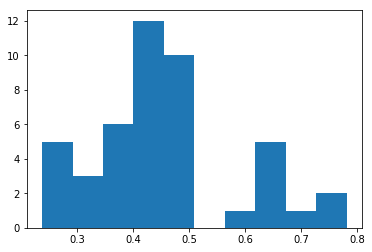

0.44376425186838186

In [70]:
plt.hist(nonZero, bins=10)
plt.show()
m

# 萃取 features

In [25]:
# extract features ################################
m = 0.1
dataset = []
# 所有的 tfidf 值
tit =df_tfidf.columns.values
# print(tit)
# print(df_tfidf.iloc[0])
for i in range(len(df_tfidf)):   
    cri = df_tfidf.iloc[i]>=m #threshold
    temp = [x for j,x in enumerate(tit) if cri[j]]
#     print(temp)
    dataset.append(temp)
dataset

[['吃飯', '好吃', '早上', '許多', '青菜', '點了'],
 ['吃飯', '豆漿', '饅頭'],
 ['吃飯', '好吃', '青菜'],
 ['他們', '只是上課'],
 ['上課', '他們', '我們', '每天', '睡覺', '都是'],
 ['上課', '之外', '充實', '意義', '明天', '生活'],
 ['上課', '我們', '打算', '明天'],
 ['上課', '明天', '無聊'],
 ['一起', '上課', '吃飯', '意思', '明天', '比較', '還是'],
 ['上課', '我們', '明天', '為了', '睡覺']]

## show 出最後篩選的結果

In [77]:
# 篩選 Tfidf 各篇文章的重要字詞
for i in range(len(df_tfidf)):
    print(dataset[i])

['吃飯', '好吃', '早上', '許多', '青菜', '點了']
['吃飯', '豆漿', '饅頭']
['吃飯', '好吃', '青菜']
['他們', '只是上課']
['上課', '他們', '我們', '每天', '睡覺', '都是']
['上課', '之外', '充實', '意義', '明天', '生活']
['上課', '我們', '打算', '明天']
['上課', '明天', '無聊']
['一起', '上課', '吃飯', '意思', '明天', '比較', '還是']
['上課', '我們', '明天', '為了', '睡覺']


# 比較未篩選
* s0='早上 去 吃飯 了，點了 許多 好吃 的 青菜。'
* s1='也 有 吃飯 了，是 吃 饅頭 和 豆漿'
* s2='吃飯 了 有 好吃 的 青菜 '
* s3='他們 只是上課'
* s4='我們 和 他們 每天 都是 上課 和 睡覺'
* s5='明天 上課 讓 生活 很 充實 之外 也 很 有 意義 了'
* s6='明天 我們 不 打算 上課 了'
* s7='明天 上課 很 無聊 了'
* s8='明天 還是 一起 去 上課 吃飯 比較 有 意思 了'
* s9='為了 上課 我們 明天 不 睡覺 了' 

In [80]:
#3

---
# SVD 降維
---
* 設 A 為一個 $m\times n$ 階實矩陣，列為文章，欄為字詞。
* SVD 為將A 分解為三個矩陣相乘：
* $A = U\Sigma V^T$
* 目標是將 A ( $m\times n$) 降維成為 A' ($m\times r$) 矩陣。

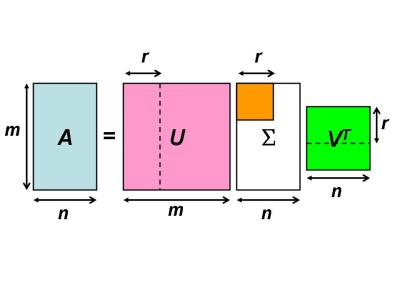

In [90]:
from IPython.display import Image
Image("pic/svd.jpg")

* A 為文章字詞矩陣，m為文章數，n為字詞數
* 其中 U 是 $m\times m$ 階，$\Sigma$ 是 $m\times n$ 階，V 是 $n\times n$ 階。
* 特別的是，方陣 $U$ 和 $V$ 都是正交矩陣 (orthogonal matrix)，也就是說，$U^T=U^{-1}，V^T=V^{-1}$。
* 正交矩陣是一個方塊矩陣，其元素為實數，而且行與列皆為正交的單位向量，使得該矩陣的轉置矩陣為其逆矩陣。
* $\Sigma$ 是對角矩陣，只有對角線有值，其他均為 0。
* $\Sigma$ 對角元素 $\sigma_i>0，i=1,2,\ldots,r$，稱為奇異值 (singular values)。為一數值遞減的對角線矩陣( 第一個元素最大 )，除了對角線上的奇異值以外皆為零，同時奇異值為非負數值，U 與 V 都是正交矩陣。
* $r$ 代表降維以後的維度，其值必須小於 $min (m,n)$。$U$ 取前面 $m\times r$維，$\Sigma$ 取前面 $r\times r$維，相乘得 $A'$。 $A$ 為文章向量。$A'$ 為降維後的結果。 
* 經過簡化後的 $U\Sigma$ 是$A$在新維度上的投影。 $D = U\Sigma$ 為降維後的文章矩陣。$m\times r$維。
*  $T = V^T\Sigma$ 為降維後的字詞矩陣。$n\times r$維。 

## 降維所能解釋的變異

In [91]:
# Fit LSI model to X and perform dimensionality reduction on X.
# 降成的維度數，其值小於 min(m,n)
num_i=3

# 降維
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object
dtm_svd_tfidf = svd.fit_transform(dtm_tfidf)  # numpy array

# 兩個維度所能解釋的變異，簡化成兩個維度
print (svd.explained_variance_)
print (svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())   

[0.06660969 0.13970681 0.11950625]
[0.08314845 0.17439512 0.1491789 ]
0.40672247637356723


[0.08314845 0.25754358 0.40672248]


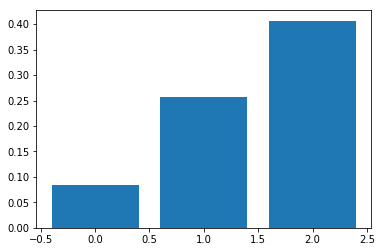

In [92]:
# 累計圖 
len_d=len(svd.explained_variance_ratio_)
print (np.cumsum(svd.explained_variance_ratio_))
ind =range(len_d)
plt.bar(ind, np.cumsum(svd.explained_variance_ratio_)[:len_d])
plt.show()

## TruncatedSVD() 函數

In [93]:
# 向量降維
# 降維的維度數，其值不能小於 min(m,n)
num_i=2
# 降成 2 維，產出 numpy array, 注意有 transform
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object
dtm_svd_tfidf = svd.fit_transform(dtm_tfidf)  # numpy array

# 10*2 矩陣，文章在兩個維度上的投影, array dtm
dtm_svd_tfidf


#有點像主成分分析

array([[ 0.09721305,  0.83276367],
       [ 0.07381281,  0.42440638],
       [ 0.11303603,  0.86649746],
       [ 0.1252298 , -0.04630918],
       [ 0.56991294, -0.1281903 ],
       [ 0.42383535, -0.04810953],
       [ 0.73226436, -0.10939373],
       [ 0.60037992, -0.06277959],
       [ 0.43399475,  0.24143134],
       [ 0.75989166, -0.12891791]])

## 維度的組成

In [105]:
# 向量降維  #無 transform
# 降維的維度數，其值不能小於 min(m,n)
num_i=2
# 降成 2 維，產出 numpy array, 注意無 transform
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object
dtm_svd_tfidf_com = svd.fit(dtm_tfidf)  # object, not numpy array
# components
comp=dtm_svd_tfidf_com.components_
print (comp)


[[ 0.08713558  0.50340261  0.08901416  0.14256767  0.08901416  0.04316853
   0.10956953  0.04860718  0.08713558  0.08901416  0.40869912  0.22367328
   0.01990493  0.48289206  0.12454012  0.08713558  0.20131318  0.21205866
   0.08901416  0.27700508  0.01990493  0.02139158  0.08713558  0.12454012
   0.04860718  0.02139158  0.01990493]
 [ 0.0617107  -0.05425415 -0.01286319 -0.04759257 -0.01286319 -0.02032275
   0.52840664  0.49376119  0.0617107  -0.01286319 -0.09049864 -0.0425397
   0.21707692 -0.03883693 -0.0356625   0.0617107  -0.04348    -0.02822956
  -0.01286319 -0.06727836  0.21707692  0.15658449  0.0617107  -0.0356625
   0.49376119  0.15658449  0.21707692]]


## 文章在維度上的投影

In [109]:
# 第一篇文章在第二個維度上的投影，使用　projection 函數。
doc=dtm_tfidf[0]
print (projection(doc,comp[0]))
print (projection(doc,comp[1]))

0.09721305000000006
0.8327636699999998


## 各篇文章的投影 dtm_tfidf

In [111]:
# 沒有標準化
dtm_svd_tfidf

array([[ 0.09721305,  0.83276367],
       [ 0.07381281,  0.42440638],
       [ 0.11303603,  0.86649746],
       [ 0.1252298 , -0.04630918],
       [ 0.56991294, -0.1281903 ],
       [ 0.42383535, -0.04810953],
       [ 0.73226436, -0.10939373],
       [ 0.60037992, -0.06277959],
       [ 0.43399475,  0.24143134],
       [ 0.75989166, -0.12891791]])

## 標準化

In [113]:
# 比較：正負號沒有變，數字改變, 
# 十篇文章在兩個維度的投影標準化，當然也可以不標準化
dtm_svd_tfidf_n = Normalizer().fit_transform(dtm_svd_tfidf)
dtm_svd_tfidf_n

array([[ 0.11594812,  0.99325527],
       [ 0.17134796,  0.98521058],
       [ 0.12935564,  0.99159826],
       [ 0.93792483, -0.34683859],
       [ 0.97562446, -0.21944684],
       [ 0.99361934, -0.11278567],
       [ 0.98902453, -0.1477514 ],
       [ 0.99457736, -0.10399941],
       [ 0.8738809 ,  0.48614007],
       [ 0.98591231, -0.16726299]])

# 繪圖

Populating the interactive namespace from numpy and matplotlib


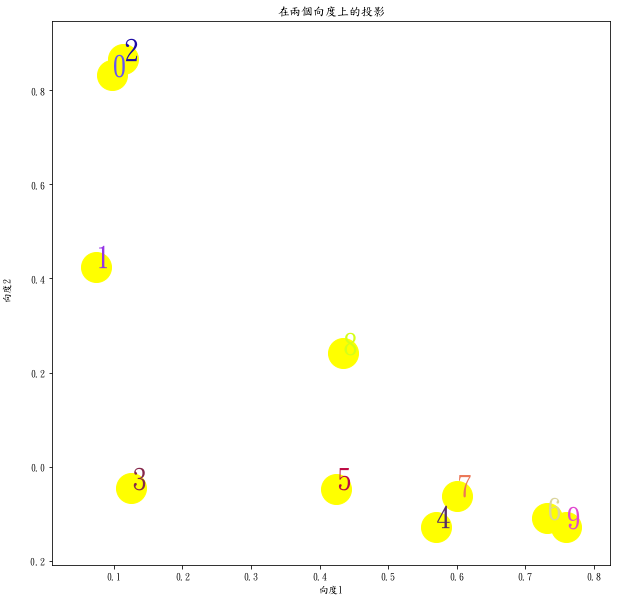

In [115]:
#疊在一起代表向量的夾角很小
import matplotlib.pyplot as plt
# 中文設定
from matplotlib import rcParams
rcParams["font.sans-serif"] = ["kaiu"] 
rcParams["font.family"] ="DFKai-sb"

%pylab inline
# 文章在 components上的投影，兩度空間作圖
com1=0
com2=1

# 這是沒有標準化的圖，如果標準化會不一樣
xs = [w[com1] for w in dtm_svd_tfidf]
ys = [w[com2] for w in dtm_svd_tfidf]

# 繪圖
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(xs, ys, s=900,color='yellow')
# 無法顯示中文文字，以數字替代
t=doc_label

for i, txt in enumerate(t):
    ax.annotate(txt, (xs[i],ys[i]), size=30,color=numpy.random.random(3))
    
xlabel('向度1')
ylabel('向度2')
title('在兩個向度上的投影')    
plt.show()

In [ ]:
s0='早上 去 吃飯 了　，　點了　許多　好吃　的　青菜。'
s1='也 有 吃飯 了　，是　吃　饅頭　和　豆漿'
s2='吃飯　了　有　好吃　的　青菜　 '
s3='他們 只是 上課'
s4='我們 和 他們 每天 都是 上課 和 睡覺'
s5='明天 上課 讓 生活 很 充實 之外 也 很 有 意義 了'
s6='明天 我們 不 打算 上課 了'
s7='明天 上課 很 無聊 了'
s8='明天 還是 一起　去 上課　吃飯　比較 有 意思 了'
s9='為了 上課 我們 明天 不 睡覺 了'

## 標準化

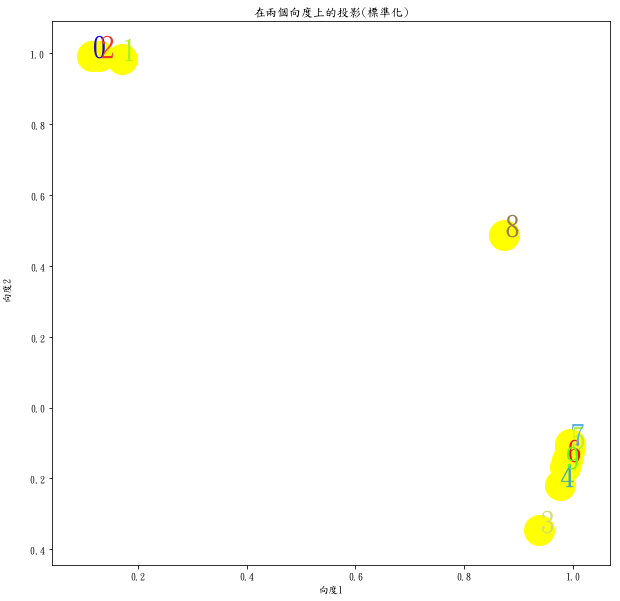

In [116]:
# 文章在 components上的投影，兩度空間作圖
com1=0
com2=1

# 這是沒有標準化的圖，如果標準化會不一樣
xs = [w[com1] for w in dtm_svd_tfidf_n]
ys = [w[com2] for w in dtm_svd_tfidf_n]

# 繪圖
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(xs, ys, s=900,color='yellow')
# 無法顯示中文文字，以數字替代
t=doc_label

for i, txt in enumerate(t):
    ax.annotate(txt, (xs[i],ys[i]), size=30,color=numpy.random.random(3))
    
xlabel('向度1')
ylabel('向度2')
title('在兩個向度上的投影(標準化)')    
plt.show()

## 在 X 軸上的投影

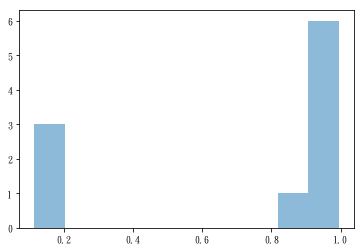

In [117]:
plt.hist(xs, alpha=0.5)
plt.show()

## 在 Y 軸上的投影

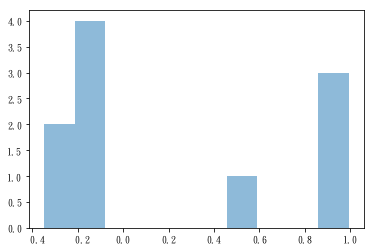

In [118]:
plt.hist(ys, alpha=0.5)
plt.show()

In [120]:
# 文章與文章間的相似矩陣，降維，函數會自動標準化
similarity= sklearn.metrics.pairwise.cosine_similarity(dtm_svd_tfidf) 
sim=pd.DataFrame(similarity)
sim

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.998433,0.999909,-0.235749,-0.104845,0.003183,-0.032079,0.012021,0.584186,-0.051820
1,0.998433,1.000000,0.999098,-0.180998,-0.049030,0.059137,0.023901,0.067957,0.628688,0.004145
2,0.999909,0.999098,1.000000,-0.222599,-0.091401,0.016692,-0.018574,0.025529,0.595097,-0.038324
3,-0.235749,-0.180998,-0.222599,1.000000,0.991175,0.971059,0.978877,0.968910,0.651022,0.982725
4,-0.104845,-0.049030,-0.091401,0.991175,1.000000,0.994150,0.997340,0.993156,0.745898,0.998586
5,0.003183,0.059137,0.016692,0.971059,0.994150,1.000000,0.999378,0.999961,0.813475,0.998486
6,-0.032079,0.023901,-0.018574,0.978877,0.997340,0.999378,1.000000,0.999027,0.792462,0.999805
7,0.012021,0.067957,0.025529,0.968910,0.993156,0.999961,0.999027,1.000000,0.818584,0.997961
8,0.584186,0.628688,0.595097,0.651022,0.745898,0.813475,0.792462,0.818584,1.000000,0.780257
9,-0.051820,0.004145,-0.038324,0.982725,0.998586,0.998486,0.999805,0.997961,0.780257,1.000000


In [121]:
# 如果不要標準化，內積是矩陣相乘之意，對角線不是1
similarity = sklearn.metrics.pairwise.safe_sparse_dot(dtm_svd_tfidf,dtm_svd_tfidf.T)
sim=pd.DataFrame(similarity)
sim

,0,1,2,3,4,5,6,7,8,9
0,0.702946,0.360606,0.732576,-0.026391,-0.051349,0.001138,-0.019913,0.006084,0.243245,-0.033487
1,0.360606,0.185569,0.376091,-0.010410,-0.012338,0.010866,0.007623,0.017672,0.134499,0.001376
2,0.732576,0.376091,0.763595,-0.025971,-0.046656,0.006222,-0.012017,0.013466,0.258257,-0.025812
3,-0.026391,-0.010410,-0.025971,0.017827,0.077306,0.055305,0.096767,0.078093,0.043169,0.101131
4,-0.051349,-0.012338,-0.046656,0.077306,0.341234,0.247716,0.431350,0.350212,0.216390,0.449598
5,0.001138,0.010866,0.006222,0.055305,0.247716,0.181951,0.315622,0.257483,0.172327,0.328271
6,-0.019913,0.007623,-0.012017,0.096767,0.431350,0.315622,0.548178,0.446505,0.291388,0.570544
7,0.006084,0.017672,0.013466,0.078093,0.350212,0.257483,0.446505,0.364397,0.245405,0.464317
8,0.243245,0.134499,0.258257,0.043169,0.216390,0.172327,0.291388,0.245405,0.246641,0.298664
9,-0.033487,0.001376,-0.025812,0.101131,0.449598,0.328271,0.570544,0.464317,0.298664,0.594055


In [122]:
# 原始沒有降維的加權矩陣
similarity= sklearn.metrics.pairwise.cosine_similarity(dtm_tfidf) 
sim=pd.DataFrame(similarity)
sim

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.126746,0.620939,0.000000,0.000000,0.000000,0.000000,0.000000,0.087808,0.000000
1,0.126746,1.000000,0.204119,0.000000,0.000000,0.000000,0.000000,0.000000,0.124282,0.000000
2,0.620939,0.204119,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141411,0.000000
3,0.000000,0.000000,0.000000,1.000000,0.265934,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.265934,1.000000,0.064612,0.274340,0.108664,0.061768,0.442317
5,0.000000,0.000000,0.000000,0.000000,0.064612,1.000000,0.200825,0.232221,0.132003,0.174178
6,0.000000,0.000000,0.000000,0.000000,0.274340,0.200825,1.000000,0.337743,0.191985,0.471989
7,0.000000,0.000000,0.000000,0.000000,0.108664,0.232221,0.337743,1.000000,0.221999,0.292928
8,0.087808,0.124282,0.141411,0.000000,0.061768,0.132003,0.191985,0.221999,1.000000,0.166511
9,0.000000,0.000000,0.000000,0.000000,0.442317,0.174178,0.471989,0.292928,0.166511,1.000000


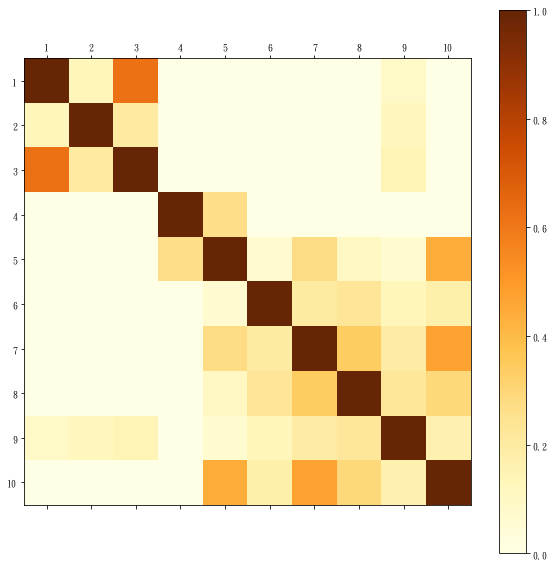

In [123]:
# 相似矩陣圖像化
# Correction Matrix Plot
# https://matplotlib.org/users/colormaps.html
import matplotlib.pyplot as plt
import pandas
import numpy
names=['1','2','3', '4', '5', '6', '7', '8', '9','10']
correlations = sim

# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# 注意都是正相關! 
cax = ax.matshow(correlations, vmin=0, vmax=1,cmap=cm.YlOrBr)
fig.colorbar(cax)
ticks = numpy.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## 最接近的文章

In [124]:
#  最接近的 k 個
def kClosestDocs(k,kw,vectorizer,dtm_lsa,documents): 
    # kw： doc序號，

    similarity= sklearn.metrics.pairwise.cosine_similarity(dtm_lsa) 

    # 宣告 dictonary, key=doc, value=數值，代表相似性
    closestDocs = {}
    for i in range(len(documents)):
        # index 與 其他字詞 的相似性
        if i!=kw:
            closestDocs[i] = similarity[kw][i]

    # 依 dictionary 的 value (即相似性) 排序
    sortedList = sorted(closestDocs , key= lambda l : closestDocs[l])
    
    # 取前 k個
    lis_sorted =sortedList[::-1][0:k]
    # 前 k個 cos theda 值
    lis_sim=[]
    for l in lis_sorted:
        lis_sim.append(closestDocs[l])
    # DataFrame        
    data=list(zip(lis_sorted, lis_sim))   
    df=pd.DataFrame(data,columns=['no.','similartiy'])     

    return df

In [128]:
# 有降維
kClosestDocs(5,9,vectorizer,dtm_svd_tfidf,documents)

,no.,similartiy
0,6,0.999805
1,4,0.998586
2,5,0.998486
3,7,0.997961
4,3,0.982725


In [129]:
# 無降維
kClosestDocs(5,9,vectorizer,dtm_tfidf,documents)

,no.,similartiy
0,6,0.471989
1,4,0.442317
2,7,0.292928
3,5,0.174178
4,8,0.166511
